<h1><center> Python Analytics Project </center></h1>

<center> <b><i>Team</i></b>: Karishma Velagaleti | Jiang Shang | Aditya Tripathi | Satyarth Poppasani </center>
<center> <b><i>Data Set </i></b>: HongKong Horse Racing Data-set</center>
<center> <b><i>Problem Statement</i></b>: Analytics for HongKong horse-race betting </center>

#### <center><b><i>Notebook 3: PREDICTING WINNING HORSE OF THE RACE (not necessarily the finishing rank) </i></b></center>

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import re
from IPython.display import Image
from sklearn import svm # read more at: scikit-learn.org
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import pydot_ng as pydot # visualization of trees (among many others)
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image # displaying images files in jupyter
from IPython.display import IFrame # displaying pdf file in jupyter

race_result_horse = pd.read_csv("race-result-horse.csv")
race_result_race = pd.read_csv("race-result-race.csv", encoding='latin-1')

In [2]:
race_result_horse["isWinner"] = race_result_horse.finishing_position=='1'

In [3]:
merged_df = race_result_race.merge(race_result_horse, on='race_id', how='inner')
print(merged_df.dtypes)

src                       object
race_date                 object
race_course               object
race_number                int64
race_id                   object
race_class                object
race_distance              int64
track_condition           object
race_name                 object
track                     object
sectional_time            object
incident_report           object
finishing_position        object
horse_number             float64
horse_name                object
horse_id                  object
jockey                    object
trainer                   object
actual_weight            float64
declared_horse_weight    float64
draw                     float64
length_behind_winner      object
running_position_1       float64
running_position_2       float64
running_position_3       float64
running_position_4       float64
finish_time               object
win_odds                 float64
running_position_5       float64
running_position_6       float64
isWinner  

In [4]:
# collecting categorical varibale names 
cat_var = merged_df.dtypes.loc[merged_df.dtypes=='object'].index
print(cat_var)

Index(['src', 'race_date', 'race_course', 'race_id', 'race_class',
       'track_condition', 'race_name', 'track', 'sectional_time',
       'incident_report', 'finishing_position', 'horse_name', 'horse_id',
       'jockey', 'trainer', 'length_behind_winner', 'finish_time'],
      dtype='object')


In [5]:
cat_var=cat_var.drop(['length_behind_winner','finish_time','src','sectional_time','incident_report']) 
#dropping unwanted cat_vars

In [6]:
# check for unique variables in cat_var
merged_df[cat_var].apply(lambda x: len(x.unique()))

race_date              166
race_course              2
race_id               1561
race_class              15
track_condition          9
race_name              958
track                    7
finishing_position      37
horse_name            1747
horse_id              1747
jockey                  88
trainer                 77
dtype: int64

In [7]:
#del merged_df['length_behind_winner','finish_time','src','sectional_time','incident_report']
merged_df.drop(['length_behind_winner','finish_time','src','sectional_time','incident_report',
               'running_position_1','running_position_2','running_position_3','running_position_4',
               'running_position_5','running_position_6'],inplace=True,axis=1)

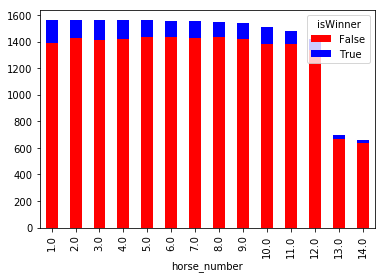

In [8]:
# horse number performance
cross_tab = pd.crosstab(merged_df['horse_number'], merged_df['isWinner'], margins=True)
cross_tab.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

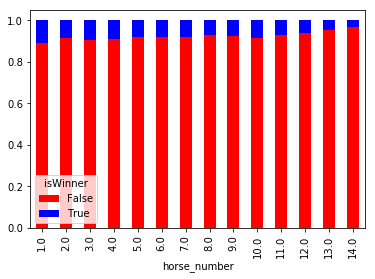

In [9]:
# percentage conversion
def perConvert(ser):
    return ser/float(ser[-1])
cross_tab_1 = cross_tab.apply(perConvert, axis=1)
cross_tab_1.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

The above chart represents the relation of horse_number and the winner of the race. Lower the horse number, better is the rank and higher is the chance of winning.

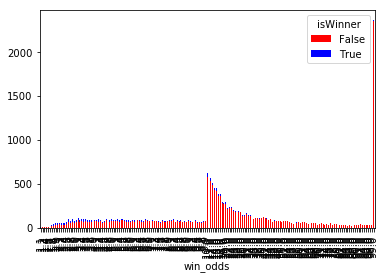

In [10]:
# win_odds performance
cross_tab = pd.crosstab(merged_df['win_odds'], merged_df['isWinner'], margins=True)
cross_tab.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)


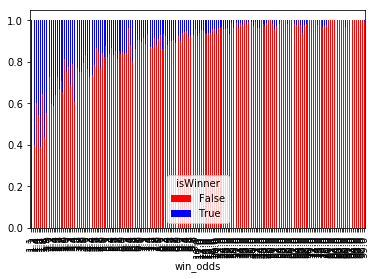

In [11]:
cross_tab_1 = cross_tab.apply(perConvert, axis=1)
cross_tab_1.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

The above chart indicates that for lower win_odds the win percentage is more.

In [12]:
merged_df.apply(lambda x: sum(x.isnull()))
merged_df = merged_df.dropna()

In [13]:
merged_df.apply(lambda x: sum(x.isnull()))

race_date                0
race_course              0
race_number              0
race_id                  0
race_class               0
race_distance            0
track_condition          0
race_name                0
track                    0
finishing_position       0
horse_number             0
horse_name               0
horse_id                 0
jockey                   0
trainer                  0
actual_weight            0
declared_horse_weight    0
draw                     0
win_odds                 0
isWinner                 0
dtype: int64

In [14]:
# since we cannot plug categorical values we need to convert it to numerical values 
# this is taken care by the LabelEncoder() function from sklearm.preprocessing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for var in cat_var:
    merged_df[var] = le.fit_transform(merged_df[var])

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19595 entries, 0 to 19995
Data columns (total 20 columns):
race_date                19595 non-null int64
race_course              19595 non-null int64
race_number              19595 non-null int64
race_id                  19595 non-null int64
race_class               19595 non-null int64
race_distance            19595 non-null int64
track_condition          19595 non-null int64
race_name                19595 non-null int64
track                    19595 non-null int64
finishing_position       19595 non-null int64
horse_number             19595 non-null float64
horse_name               19595 non-null int64
horse_id                 19595 non-null int64
jockey                   19595 non-null int64
trainer                  19595 non-null int64
actual_weight            19595 non-null float64
declared_horse_weight    19595 non-null float64
draw                     19595 non-null float64
win_odds                 19595 non-null float64
isWinne

In [16]:
merged_df.head()

,race_date,race_course,race_number,race_id,race_class,race_distance,track_condition,race_name,track,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,win_odds,isWinner
0,0,1,1,0,7,1400,2,864,1,0,1.0,357,3,4,14,133.0,1032.0,1.0,3.8,True
1,0,1,1,0,7,1400,2,864,1,10,2.0,1195,699,21,15,133.0,1075.0,13.0,8.0,False
2,0,1,1,0,7,1400,2,864,1,12,10.0,626,381,84,73,121.0,1065.0,3.0,5.7,False
3,0,1,1,0,7,1400,2,864,1,14,3.0,1518,491,35,10,132.0,1222.0,2.0,6.1,False
4,0,1,1,0,7,1400,2,864,1,16,7.0,1551,0,86,40,125.0,1136.0,9.0,6.1,False


In [17]:
# creating a seperate prediction set for post cross validation
#post16_X_test = merged_df[le.inverse_transform(merged_df.race_date)>='2016-01-01'] 
#post16_y_test = merged_df[le.inverse_transform(merged_df.race_date)>='2016-01-01',-1] 
X = merged_df[['horse_number','jockey','declared_horse_weight','draw','win_odds']]
y = merged_df['isWinner'] 

print(X.shape, y.shape)


(19595, 5) (19595,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15676, 5) (3919, 5) (15676,) (3919,)


In [19]:
# list of classifiers
base_clf = tree.DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=17,random_state=1)
classifers = [DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=17,random_state=1),svm.LinearSVC(C=1000),
             BaggingClassifier(n_estimators=20, base_estimator=base_clf, oob_score=True),
             RandomForestClassifier(max_features="sqrt", n_estimators=20)]
for cl in classifers:
    clf = cl
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)*100
    print('Accuracy of %r Classifier = %2f' % (cl, accuracy) + ' %')
    print('\n')
           

Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=17, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best') Classifier = 90.813983 %


Accuracy of LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) Classifier = 93.033937 %




C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:608: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


Accuracy of BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=17, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False) Classifier = 92.778770 %


Accuracy of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) Classifier = 92.293953 %




The above output shows that the accuracy of most classifiers corresponds to 92%.

The below confusion matrix represents the prediction result from the tree classifier.

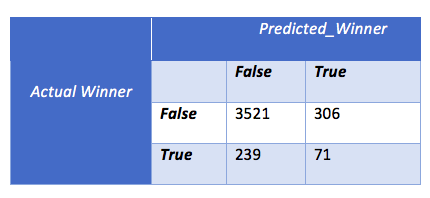

In [6]:
Image("K.jpg")

From this table, we can note that accuracy is not the best measure here as we are trying to predict the winner of race and the losers of the race and how it affects any bettor.
For example, there are 377 races(winners). If a person bets USD 10 on each race, he invests a total of USD 3770.
Even if we consider an average return of 3 times the bet, the overall return will be USD2130.
Hence, the total returns for the bettor is -USD1640.
 
Therefore, it is important to consider the False positive rate and True positive rate in order to get the best model.